# Assignment 4

Exercises 1 & 2 


In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)  # reproducibility

## Exercise 1 — Central Limit Theorem (CLT)

In [3]:
# Generate a non-normal population: exponential distribution
population = rng.exponential(scale=1.0, size=500_000)
true_mu = population.mean()
true_sigma = population.std(ddof=0)
print(f"True mean={true_mu:.4f}, True std={true_sigma:.4f}")

True mean=0.9981, True std=0.9983


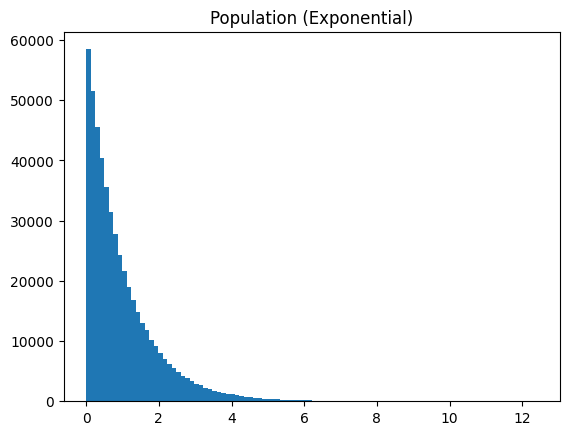

In [4]:
plt.hist(population, bins=100)
plt.title('Population (Exponential)')
plt.show()

n=2, mean≈1.0015, std≈0.6964


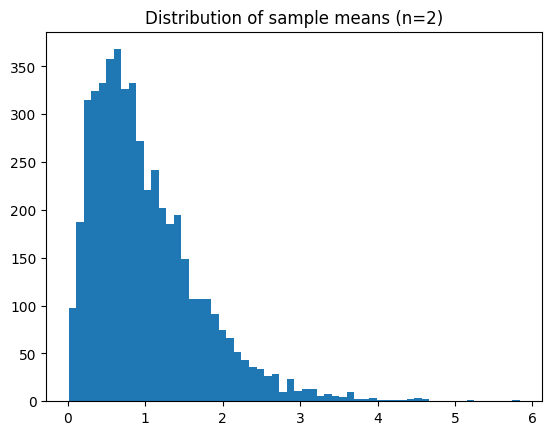

n=5, mean≈0.9970, std≈0.4416


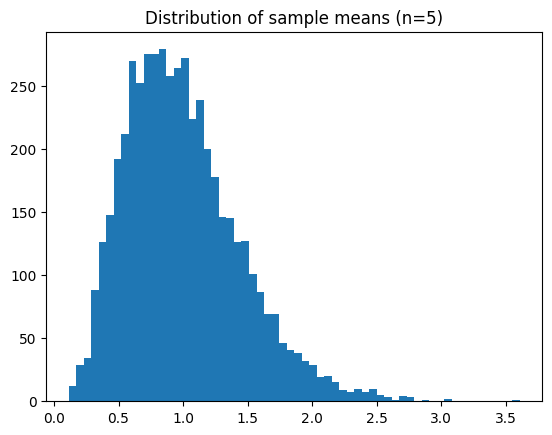

n=10, mean≈0.9999, std≈0.3127


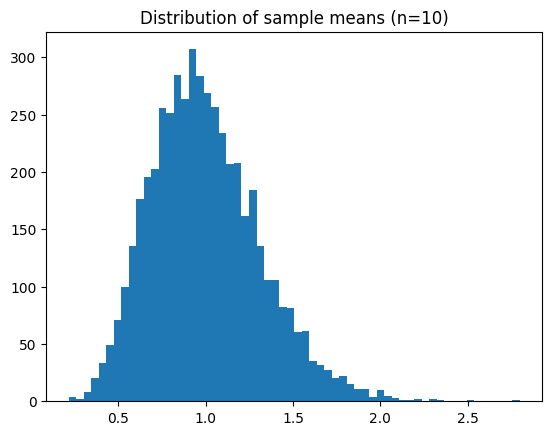

n=30, mean≈0.9995, std≈0.1791


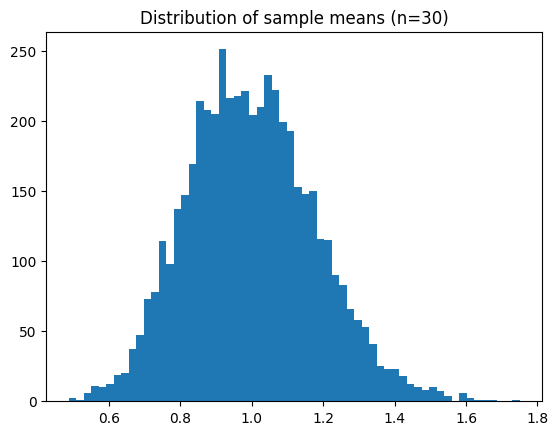

n=50, mean≈0.9969, std≈0.1390


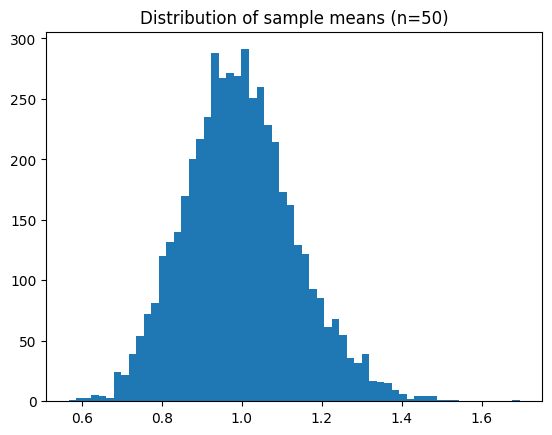

n=100, mean≈0.9980, std≈0.1014


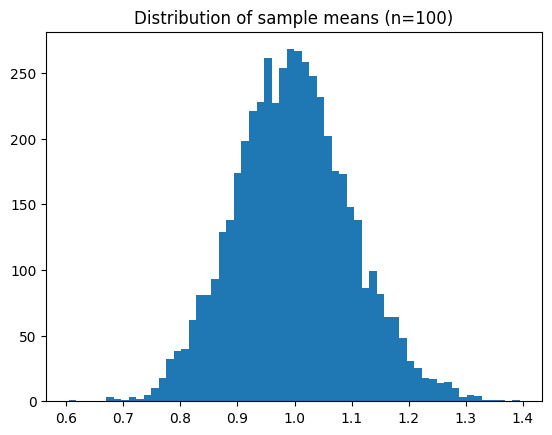

In [5]:
def sample_means(pop, n, reps=5000):
    idx = rng.integers(0, len(pop), size=(reps, n))
    return pop[idx].mean(axis=1)

ns = [2, 5, 10, 30, 50, 100]
for n in ns:
    means = sample_means(population, n)
    print(f"n={n}, mean≈{means.mean():.4f}, std≈{means.std(ddof=1):.4f}")
    plt.hist(means, bins=60)
    plt.title(f'Distribution of sample means (n={n})')
    plt.show()

## Exercise 2 — Law of Large Numbers (LLN)

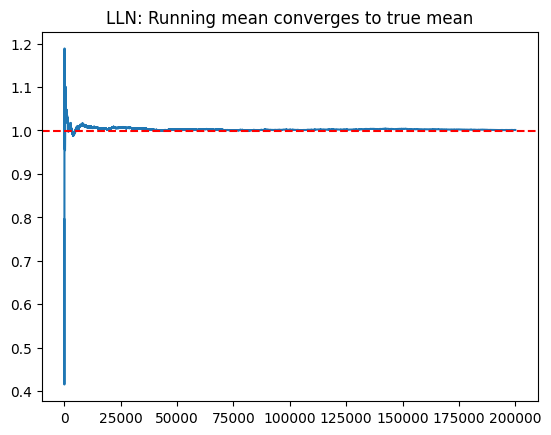

In [6]:
N = 200_000
data = rng.choice(population, size=N, replace=True)
running_mean = np.cumsum(data) / (np.arange(N) + 1)

plt.plot(running_mean)
plt.axhline(true_mu, linestyle='--', color='r')
plt.title('LLN: Running mean converges to true mean')
plt.show()